In [1]:
pip install osmnx pandas geopy

Note: you may need to restart the kernel to use updated packages.


In [1]:
import osmnx as ox
import networkx as nx
from geopy.geocoders import Nominatim
import pandas as pd
import time

# Step 1: List of major cities/towns in Uttarakhand
uttarakhand_cities = [
    "Dehradun", "Haridwar", "Rishikesh", "Mussoorie", "Nainital", "Haldwani",
    "Rudrapur", "Kashipur", "Roorkee", "Almora", "Pithoragarh", "Chamoli",
    "Tehri", "Uttarkashi", "Joshimath", "Bageshwar", "Doiwala", "Kichha",
    "Sitarganj", "Khatima", "Tanakpur", "Lohaghat", "Ranikhet", "Kotdwara", "New Tehri"
]

# Step 2: Load road network of Uttarakhand 
print(" Downloading Uttarakhand road network...")
G = ox.graph_from_place("Uttarakhand, India", network_type='drive')
print("Road network loaded.")

# Step 3: Get city coordinates
geolocator = Nominatim(user_agent="uttarakhand_route_rover")
city_coords = {}

for city in uttarakhand_cities:
    try:
        location = geolocator.geocode(f"{city}, Uttarakhand, India")
        if location:
            city_coords[city] = (location.latitude, location.longitude)
            print(f" {city} → {location.latitude}, {location.longitude}")
        else:
            print(f"Could not geocode {city}")
        time.sleep(1)  # avoid API limit
    except Exception as e:
        print(f"Error for {city}: {e}")

# Step 4: Get nearest road node for each city
city_nodes = {}
for city, (lat, lon) in city_coords.items():
    node = ox.distance.nearest_nodes(G, lon, lat)
    city_nodes[city] = node

# Step 5: Calculate road distances between all city pairs
edges = []
print("\n Calculating road distances between cities...")
for city1 in city_nodes:
    for city2 in city_nodes:
        if city1 != city2:
            try:
                distance = nx.shortest_path_length(G, city_nodes[city1], city_nodes[city2], weight='length')
                distance_km = round(distance / 1000, 2)
                edges.append([city1, city2, distance_km])
            except:
                print(f" No path found between {city1} and {city2}")

# Step 6: Save to CSV
df = pd.DataFrame(edges, columns=["from_name", "to_name", "distance_km"])
df.to_csv("uttarakhand_road_graph.csv", index=False)

print("\n CSV saved as 'uttarakhand_road_graph.csv' with", len(df), "routes.")


C:\Users\aditi\AppData\Local\Programs\Python\Python312\Lib\site-packages\osmnx\_overpass.py:267: UserWarning: This area is 25 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


Road network loaded.
 Dehradun → 30.3255646, 78.0436813
 Haridwar → 29.9384473, 78.1452985
 Rishikesh → 30.1086537, 78.2916193
 Mussoorie → 30.4569012, 78.0782906
 Nainital → 29.3905295, 79.460869
 Haldwani → 29.2144809, 79.5279012
 Rudrapur → 28.9707183, 79.3972845
Error for Kashipur: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Kashipur%2C+Uttarakhand%2C+India&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))
Error for Roorkee: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Roorkee%2C+Uttarakhand%2C+India&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))
Error for Almora: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded wit

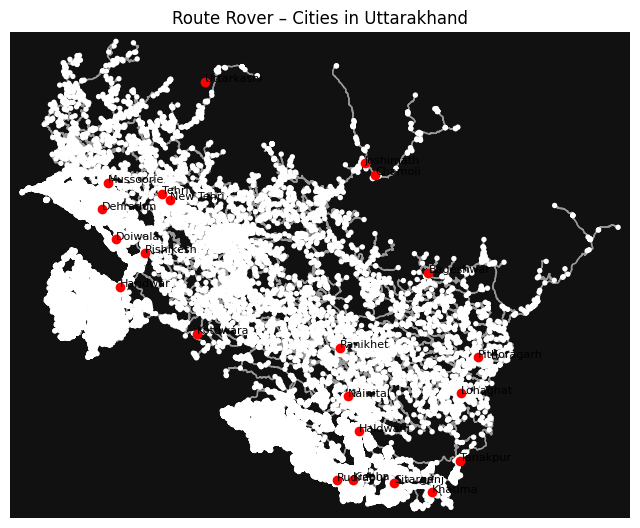

In [2]:
import matplotlib.pyplot as plt

fig, ax = ox.plot_graph(G, show=False, close=False)

# Plot cities
for city, (lat, lon) in city_coords.items():
    x, y = lon, lat
    ax.plot(x, y, 'ro', markersize=6)
    ax.text(x, y, city, fontsize=8, color='black')

plt.title("Route Rover – Cities in Uttarakhand")
plt.savefig("uttarakhand_city_map.png", dpi=300)
plt.show()


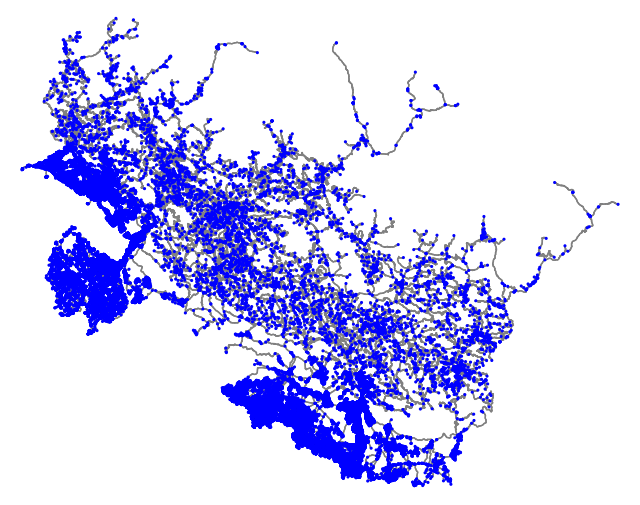

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [3]:
import matplotlib.pyplot as plt
ox.plot_graph(G, bgcolor='white', node_color='blue', edge_color='gray', node_size=5)
